# Soziale Netzwerkaaylse mit Pyhton und NetworkX

- SNA lässte sich für viele verschiedene Anwendungsszenarien einsetzen, doch dafür muss man wissen was es ist und nicht ist. 
- Mit NetworkX kann man vor allem gut Netzwerkdaten erzeugen. 
- Mit NetworkX kann man auch SNA betreiben, man kann aber wie wir auch morgen sehen werden für vieles Gephi nutzen. 


- Installieren:
- ```pip install networkx```
- ```pip install seaborn``` # visualisierung

## Agenda

1. Eine Mini Einführung zu Graphen und SNA
2. Graphen erstellen und manipulieren mit NetworkX
    * Daten Strukturen: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs.
    * Knoten und Kanten hinzufügen
    * Attribute für Knoten und Kanten
    * Graphen generatoren. 
    * Graphen visualisieren mit Matplotlib. 
    * Übliche Formate zum Lesen und Schreiben von Graphen. 
3. Netzwerkanalyse
    * Einfachste Konzepte: Degree.
    * Distanzmetriken: paths and shortest paths.
    * Verschiedene Metriken für Zentralität.


## Eine mini Einleitung zu Graphen

Soziale Netzwerkanalyse ist der analytische Versuch soziale Strukuren und Phänmente in Form von Graphen auszudrücken. Der Ansatz ist relational, d.h. man fokussiert sich nicht auf die Akteure sondern auf ihre Beziehungen untereinander. 

Die untersuchten Netzwerke bestehen immer aus Knoten und Kanten. Knoten können sein: individuelle Personen, Firmen, Länder, Twitter-Accounts...). Kanten können sein: Interaktionen, Geldflüsse, Emails, Telefonate, Handelsbeziehungen, etc...

Wir werden Graph und Netzwerk synonym gebrauchen. 

* Ein **Graph**  $G=(V,E)$  besteht aus einem Satz $n$ Knoten und und $m$ kanten, die jeweils die Knoten verbinden. Die Größe des Graphes ist die Anzahl seiner Kanten. Zwei Knoten sind benachbart wenn sie durch eine Kante verbunden sind. 


* Der **küzreste Pfad** zwischen zwei Knoten ist der Pfad mit der minimalen Anzahl an Kanten. Die **Entfernung** zwischen zwei Knoten ist die länge des kürzesten Pfades. Der **Durchmesser** eines Graphen ist dir längste kürzeste Pfad zwischen zwei Knoten. 


* Die **Dichte** eines Graphen misst wie viele Kanten im Verhältniss zur maximal möglichen Anzahl aller Knoten im Graphen vorhanden sind. 


* Der **Grad** eines Knotens wird durch die Anzahl der Kanten bestimmt die mit ihm verbunden sind. 


## Graphen erstellen mit NetworkX

NetworkX ist ein Paket für die Erstellung, Manipulation und Analyse von komplexen Netzwerken. 


In [3]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.2


### Data Structures: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs
### Daten Strukturen: Graphen,DiGraphs, MultiGraphs und MultiDiGraphs

* **Graph**: Undirektionaler Graph # z.B. Facebook

* **DiGraph**: Direktionaler Graph # z.B. Twitter

* **MultiGraph**: Unidirektionaler Graph mit mehreren Kanten # z.B. Freundschaften und Sex zwischen Personen

* **MultiDiGraph**: Direktionaler Graph mit mehrern Kanten # z.B. Emails und Whatsapp Nachrichten zwischen Personen

In [4]:
G = nx.Graph()
D = nx.DiGraph()
MG = nx.MultiGraph()
MDG = nx.MultiDiGraph()

#### Beispiel eines Dreiecks

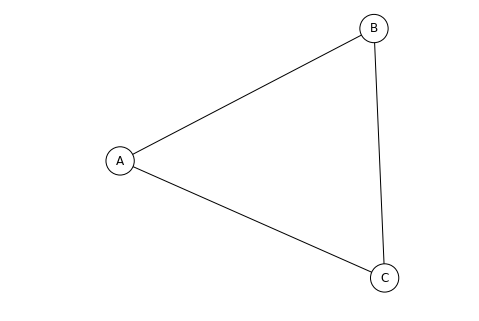

In [5]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C')])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

Es gibt drei Arten Graphen zu darzustellen. Als:

**Adjacency Matrix** A $n x n$ matrix:

        0  1  1        G = [[0, 1, 1],
        1  0  1             [1, 0, 1],
        1  1  0             [1, 1, 0]]

Hier sind in jeder Reihe und Spalte jeweils die Personen. 

**Adjacency List** A list of neighbors:

        A: B, C        G = {'A': ['B', 'C'],
        B: A, C             'B': ['A', 'C'],
        C: A, B             'C': ['A', 'B']} 

Hier speichert man pro Person die Kanten ab. 

**Edge List** A list of edges:

        A B            G = [['A', 'B'],
        A C                 ['A', 'C'],
        B C                 ['B', 'C']]

Hier speichert man nur die Kanten ab und folgert so drauss dass Knoten existieren müssen. 

Network X speichert Graphen als Adjecency Listen ab, das ist schnell und recht leichtgewichtig. 

Wir können z.B. solche einfachen Sachen machen:

* **n in G** um zu schauen ob Knoten n sich im Graphen befindet
* **for n in G** über alle Knoten loopen
* **G[n]** alle Nachbarn von n holen 
* **len(G)** die Anzahl der Knoten in G holen 

Im Grunde funktioniert es so ein bisschen wie ein Dictionairy. 

In [6]:
print(G.adj)

{'A': {'C': {}, 'B': {}}, 'C': {'A': {}, 'B': {}}, 'B': {'A': {}, 'C': {}}}


In [7]:
'A' in G

True

In [8]:
for n in G:
    print(n)

A
C
B


In [9]:
G['A']

AtlasView({'C': {}, 'B': {}})

In [10]:
len(G)

3

### Graphen ersetllen und Knoten und Kanten hinzufügen

Einen Graphen kann man auf zwei Weisen erstellen:

* Knoten hinzufügen mit: 
    - **G.add_node** : Einen Knoten hinzufügen
    - **G.add_nodes_from** : Gleich mehrere Knoten hinzufügen
* Kanten hinzufügen mit: 
    - **G.add_edge**: Eine Kante hinzufügen 
    - **G.add_edges_from** : Gleich mehrere Kanten hinzufügen


In [12]:
# Create an undirected Graph
G = nx.Graph()
# Einen Knoten
G.add_node(1)  
# Mehrere Knoten
G.add_nodes_from([2, 3])

Ein Graph kann auch durch das hinzufügen von Kanten erstellt werden. 

Falls die Kante schon existiert gibt es keinen Fehler. 

Falls die Knoten die zwischen denen die Kante exisiteren soll nicht existieren werden sie automatisch hinzugefügt. 

In [13]:
# Eine Kante
G.add_edge(1, 2)
# Mehrere Kanten
G.add_edges_from([(1, 2), (1, 3)])

Genau gleich kann man auch Knoten und Kanten entfernen. 

* Removing nodes with:
    - **G.remove_node** : Einen Knoten 
    - **G.remove_nodes_from** : Mehrere Knoten 
* Adding edges with:
    - **G.remove_edge**: Eine Kante 
    - **G.remove_edges_from** : Mehrere Kanten


### Attribute für Graphen, Knoten und Kanten 
Ein Graph, Knoten und Kanten können auch attribute haben. So ähnlich wie ein Dict. 

In [15]:
# Dem Graphen Attribute geben 
G = nx.Graph(day='Friday', name='My Graph')
G.graph

{'day': 'Friday', 'name': 'My Graph'}

In [16]:
# Verändern
G.graph['day']='Monday'
G.graph

{'day': 'Monday', 'name': 'My Graph'}

#### Knoten Attribute

Die bisherigen Methoden können **G.add_node** und **G.add_nodes_from** können weiter benutzt werden. 

In [19]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm') # mehrere Knoten
G.node[1]['room'] = 714 # neues attribut hinzufügen

Man kann Knoten mit ihren Attributen einfach überschreiben, es schmeisst keinen Fehler. 

In [20]:
G.add_node(3, room=715)

Man kann die Attribute natürlich auch wieder auslesen:

In [21]:
G.node[1]['time']

'5pm'

In [22]:
#Die attribute sind ein normales dict
G.node[1]

{'room': 714, 'time': '5pm'}

Normalerweise iterieren wir über die Knoten und ihre Attribute

In [24]:
# Ohne dass wir es networkx sagen gibt er die attribute nicht aus
list(G.nodes())

[1, 3]

In [25]:
# Mit data=True
list(G.nodes(data=True))

[(1, {'room': 714, 'time': '5pm'}), (3, {'room': 715, 'time': '2pm'})]

In [28]:
# Man kann auch das Attribut nennen an dem man interessiert ist
print(list(G.nodes(data='room')))

[(1, 714), (3, 715)]


#### Kanten Attribute

Funktioniert analog:

In [37]:
G.add_edge(1, 2, weight=4.0 )
G.add_edges_from([(3, 4),(4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])
G[1][2]['weight'] = 4.0 #man kann auch existierenden kanten auch attribute geben

oder auch überschreiben

In [39]:
G.add_edge(3, 4, weight=12)

Um die Attribute rauszuholen gehts analog:

In [41]:
G[1][2]['weight'] # or  G.edge[1][2]['weight']

4.0

In [42]:
# Oder alle attribute bekommen
G[1][2] 

{'color': 'blue', 'weight': 4.0}

In der Praxis iterieren wir einfach über Kanten und ihre Attribute

In [43]:
# Edges without attributes
list(G.edges())

[(1, 2), (2, 3), (3, 4), (4, 5)]

In [44]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'color': 'blue', 'weight': 4.0}),
 (2, 3, {'weight': 8}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (4, 5, {'color': 'red'})]

In [46]:
# Analog kann man auch das Attribut angeben an dem man interessiert ist:
print(list(G.edges(data='weight')))

[(1, 2, 4.0), (2, 3, 8), (3, 4, 12), (4, 5, None)]


Ein ganz praktischer Befehl ist: **nx.info**

In [47]:
print(nx.info(G))

Name: My Graph
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


### Aufgabe: Graphen bauen

Baut einen Graphen mit 50 Knoten.

In [48]:
# Dein code hier

Fügt zufällig 50 kanten zwischen den Knoten hinzu:

In [36]:
# Dein code hier

### Es gibt auch mehr Wege mit Graphen zu arbeiten

Hier ein paar Beispiele

* **nx.subgraph(G, node_list)** : gib mir nur einen Teil des Graphen in dem diese Knoten drin sind
* **nx.union(G1,G2)** : vereinige zwei Graphen
* **nx.compose(G1,G2)**:  vereinige zwei Graphen in der Schnittmenge der Knoten

### Graph Generators

NetworkX hat auch ein paar Beispielgraphen [hier](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html). 

Für uns nicht weiter wichtig, aber diese Graphen haben teilweise gesondere Eigenschaften die Wissenschaftler interessieren. 

Some examples:

In [49]:
# small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

# classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Graphen mit Matplotlib zeichnen. 

NetworkX ist nicht dazu gedacht graphen zu visualisieren, man kann aber mit Matplotlib so einiges hinbekommen, vor allem wenn die Graphen einfach sind. Wenn sie groß werden nutzen wir dann Gephi.

Nehmen wir einen Beispielgraph, die Florentinischen Familien von Romeo und Julia:

In [50]:
G = nx.florentine_families_graph()

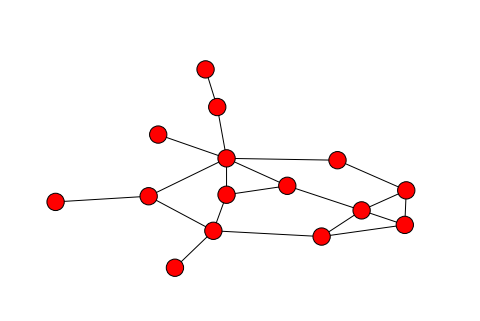

In [51]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(G)

Der default Layout ist der sog. spring Layout. Hier stoßen sich die Knoten gegenseitig ab und er versucht ein Layout zu finden bei dem jeder Knoten an seiner "optimalen" position liegt. 

Man kann aber auch andere Layouts vorrausberechten und sie dann zur  **nx.draw** Funktion übergeben. 

In [52]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([0.4072741 , 0.40440078]),
 'Albizzi': array([-0.16962676,  0.31043869]),
 'Barbadori': array([ 0.26493077, -0.27035769]),
 'Bischeri': array([-0.40501088, -0.3012009 ]),
 'Castellani': array([ 0.03062413, -0.53778041]),
 'Ginori': array([-0.42901384,  0.49609662]),
 'Guadagni': array([-0.41305898,  0.08316145]),
 'Lamberteschi': array([-0.73210073,  0.22924873]),
 'Medici': array([0.23414643, 0.12626595]),
 'Pazzi': array([1.        , 0.25179842]),
 'Peruzzi': array([-0.26408182, -0.57139945]),
 'Ridolfi': array([ 0.03182273, -0.11215034]),
 'Salviati': array([0.67545774, 0.19567707]),
 'Strozzi': array([-0.15646252, -0.39262153]),
 'Tornabuoni': array([-0.07490036,  0.0884226 ])}

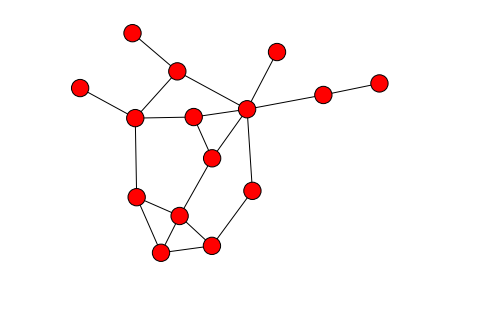

In [53]:
nx.draw(G, pos=pos_fr)

Wir können auch die Farbe sowie Beschriftung der Knoten und Kanten anpassen mit den Parametern von **nx.draw**:

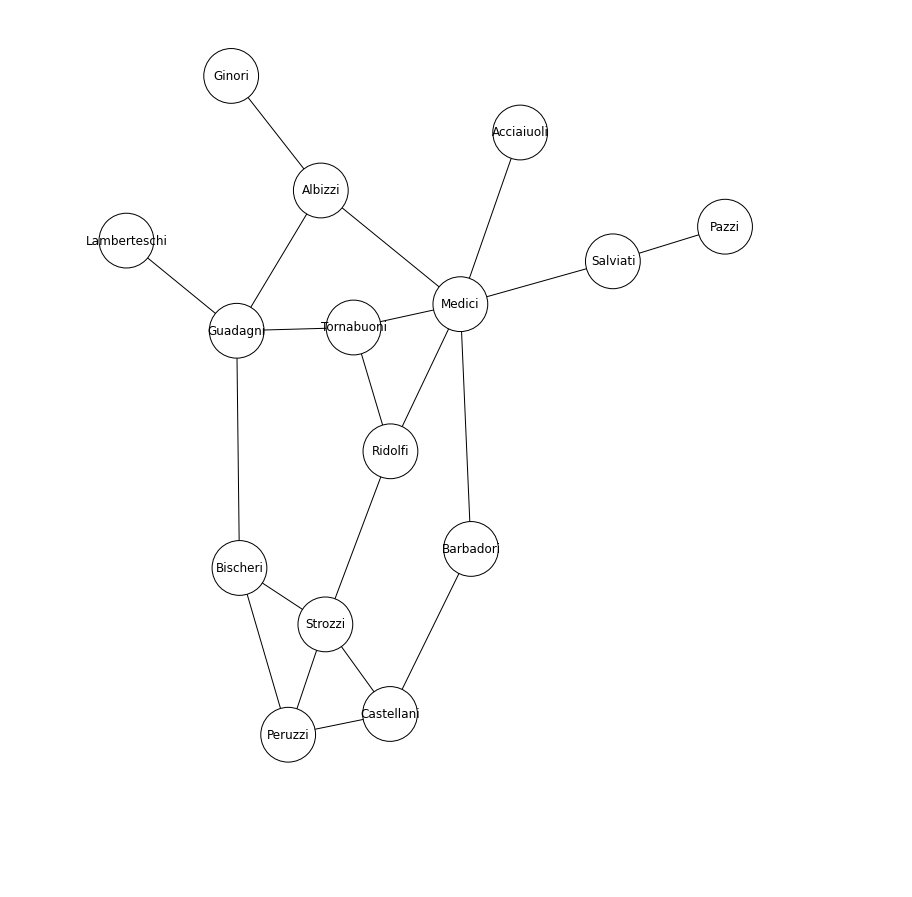

In [54]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

Wenn man komplexere Plots machen möchte, zb. Knoten bestimmte Farben oder Größen geben oder bestimmte Kanten hervorheben geht das mit den folgenden Funktionen: 

* **nx.draw_networkx_nodes**
* **nx.draw_networkx_edges**
* **nx.draw_networkx_lables**
* **nx.draw_networkx_edge_lables**

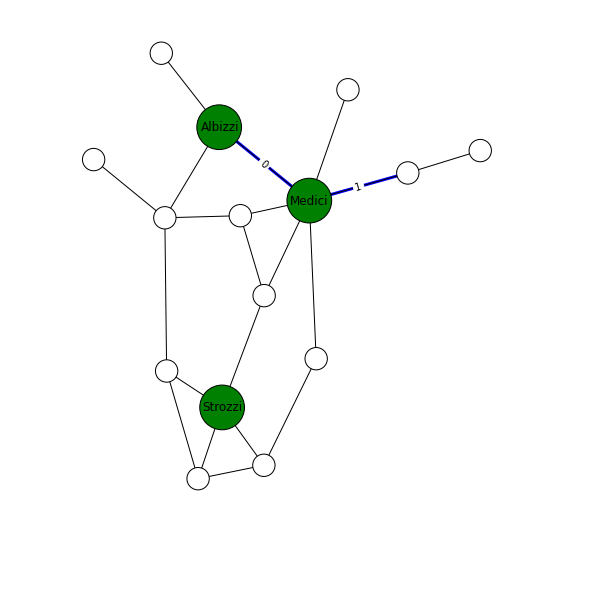

In [55]:
plt.figure(figsize=(10,10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(G) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(G.edges()) - thick_edges
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='white')
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos=pos_fr, edge_list=other_edges)
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in big_and_green_nodes})
# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)})
# Remove axes
ax = plt.gca()
ax.set_axis_off()

### Übliche Formate um Graphen zu lesen und zu schreiben

Die komplette Liste [aller Formate](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) findet sich online. 

Hier ein paar Beispiele:

* **Adjacency list** Einfaches format, keine Attribute
    - **nx.read_adjlist**
    - **nx.write_adjlist**
* **Edge list** Einfaches format, keine Attribute
    - **nx.read_edgelist**
    - **nx.write_adjlist**
* **GEXF** Entworfen als standard exchange format für graphen (Gephi)
    - **nx.read_gexf**
    - **nx.write_gexf**
* **Pickle** Python standard persitenz modul um auf festplatte zu schreiben
    - **nx.read_gpickle**
    - **nx.write_gpickle**
* **GraphML** An XML-based format für graphen 
    - **nx.read_graphml**
    - **nx.write_graphml**
* **Pajek** Format für Pajek, eines der Urprogramme für SNA
    - **nx.read_pajek**
    - **nx.write_pajek**

## Netzwerkanalyse

Jetzt probieren wir ein paar einfache analysetechniken aus, die uns etwas über die Struktur des Graphen und der Wichtigkeit der Knoten verrraten. 

### Basic : Degree

Der degree ist die Anzahl der Kanten die mit dem Knoten verbunden sind. 

* **undirected graphs** gleich der Anzahl der Nachbarn. 

* **directed graphs** müssen wir zwischen rein-kommenden und raus-gehenden Kanten unterscheiden.
    - **In-degree** Number of predecessors
    - **Out-degree** Nuber of successors

#### Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

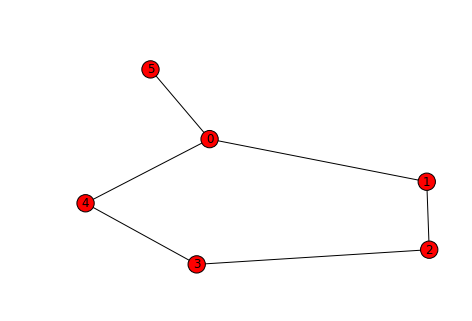

In [56]:
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [57]:
# Man kann auch den degree für einen einzelenn Knoten haben
G.degree(5)

1

#### Kleine Beispiele
Wie bekommt man den Knoten mit dem höchsten degree?

In [58]:
max(G, key=G.degree)

0

Wie bekommt man alle Nachbarn von Knoten 0?

In [60]:
list(G.neighbors(0))

[1, 4, 5]

#### Directed Graphs

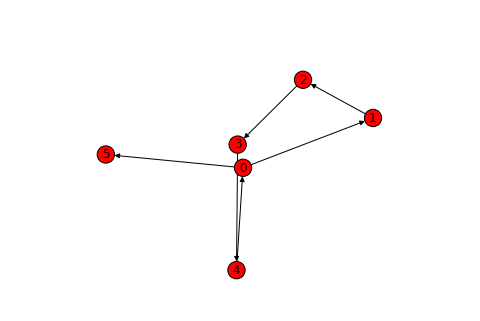

In [61]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)

In [62]:
dict(D.in_degree())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

In [63]:
dict(D.out_degree())

{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0}

#### Kleine Beispiele

Wie bekommen wir alle "Nachfolger" des Knoten 0?

In [59]:
list(D.successors(0))

[1, 5]

In [65]:
# oder Vorgänger?
list(D.predecessors(0))

[4]

#### Gewichtete Graphen und gewichteter degree 

Kanten können Attribute haben und das wichtigste ist **weight** mit dem man angibt wie stark die Kante ist. 

Der gewichtete degree eines Knotens ist eben die summe der gewichteten Kanten. 

{(0, 1): <matplotlib.text.Text at 0x11a5639d0>,
 (0, 4): <matplotlib.text.Text at 0x11a224590>,
 (1, 2): <matplotlib.text.Text at 0x11a563b50>,
 (2, 3): <matplotlib.text.Text at 0x11a224e50>,
 (3, 4): <matplotlib.text.Text at 0x1180660d0>}

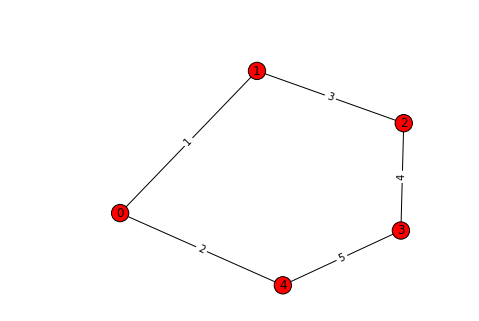

In [67]:
W = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [68]:
dict(W.degree())

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2}

In [69]:
dict(W.degree(weight='weight'))

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

#### Kleine Beispiele

Wie können wir den Knoten mit dem größten gewichteten Degree bekommen?

In [70]:
wdegree = dict(W.degree(weight='weight'))
max(W, key=wdegree.get)

3

### Pfade und kürzeste Pfade

Mit NetworkX können wir bestimmen ob Knoten auf einem Pfad liegen oder wo die kürzesten Pfade lang laufen.

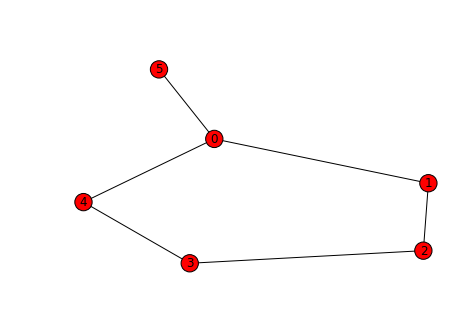

In [73]:
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)

#### Undirected Graphs

In [71]:
nx.has_path(G, 0, 3)

True

In [72]:
nx.shortest_path(G, 0, 3)

[0, 4, 3]

In [70]:
nx.shortest_path_length(G, 0, 3)

2

Man kann auch alle Kanten die auf diesem Pfad liegen bestimmen:

In [74]:
path = nx.shortest_path(G, 0, 3)
path_edges = list(zip(path, path[1:]))
print("nodes in path: {}".format(path))
print("edges in path: {}".format(path_edges))

nodes in path: [0, 4, 3]
edges in path: [(0, 4), (4, 3)]


Man kann auch alle möglichen kürzesten Pfade für einen Knoten zu den anderen Knoten bestimmen.

In [76]:
nx.single_source_shortest_path(G, 0)

{0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 4, 3], 4: [0, 4], 5: [0, 5]}

#### Directed Graphs

Für gerictete Graphen müssen wir den Kantenrichtung folgen

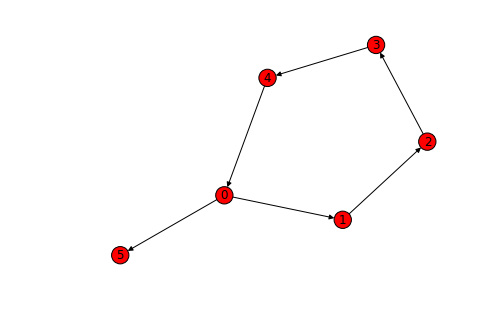

In [84]:
nx.draw(D, pos=nx.fruchterman_reingold_layout(G), with_labels=True)

In [85]:
nx.has_path(D, 0, 3)

True

In [86]:
list(nx.all_simple_paths(D, 0, 3))

[[0, 1, 2, 3]]

In [87]:
nx.shortest_path(D, 0, 3)

[0, 1, 2, 3]

In [88]:
nx.shortest_path_length(D, 0, 3)

3

In [89]:
nx.single_source_shortest_path(D, 0)

{0: [0],
 1: [0, 1],
 2: [0, 1, 2],
 3: [0, 1, 2, 3],
 4: [0, 1, 2, 3, 4],
 5: [0, 5]}

#### Weighted Graphs

Für gewichtete Grpahen müssen wir natürlich das Gewicht berücksichtigen. Der kürzeste Pfad liegt ja damit somit nicht mehr immer dort wo man am wenigsten Knoten passieren muss. 

Für gewichtete Graphen müssen wir das Gewicht in Form von **weight** mitgeben:

{('a', 'b'): <matplotlib.text.Text at 0x11a589510>,
 ('a', 'c'): <matplotlib.text.Text at 0x11b089350>,
 ('c', 'b'): <matplotlib.text.Text at 0x11afc5510>,
 ('c', 'd'): <matplotlib.text.Text at 0x11a49d550>}

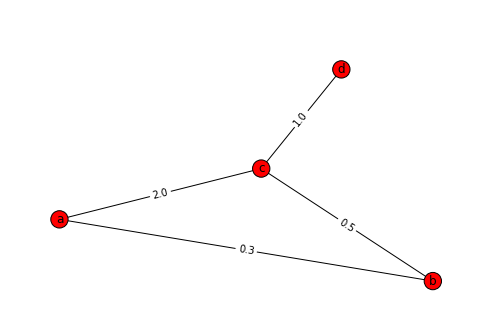

In [91]:
W = nx.Graph()
W.add_edge('a', 'b', weight=0.3)
W.add_edge('b', 'c', weight=0.5)
W.add_edge('a', 'c', weight=2.0)
W.add_edge('c', 'd', weight=1.0)
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [92]:
nx.shortest_path(W, 'a', 'd')

['a', 'c', 'd']

In [93]:
nx.shortest_path(W, 'a', 'd',weight='weight')

['a', 'b', 'c', 'd']

In [94]:
nx.shortest_path_length(W, 'a', 'd',weight='weight')

1.8

### Beispiel für die Florentinischen Familien

Kürzeste Pfade müssen nicht unique sein, es gibt mehrere Wege zum Ziel. Mit 
**nx.all_shortest_paths** bekommt man alle kürzesten Pfade. 

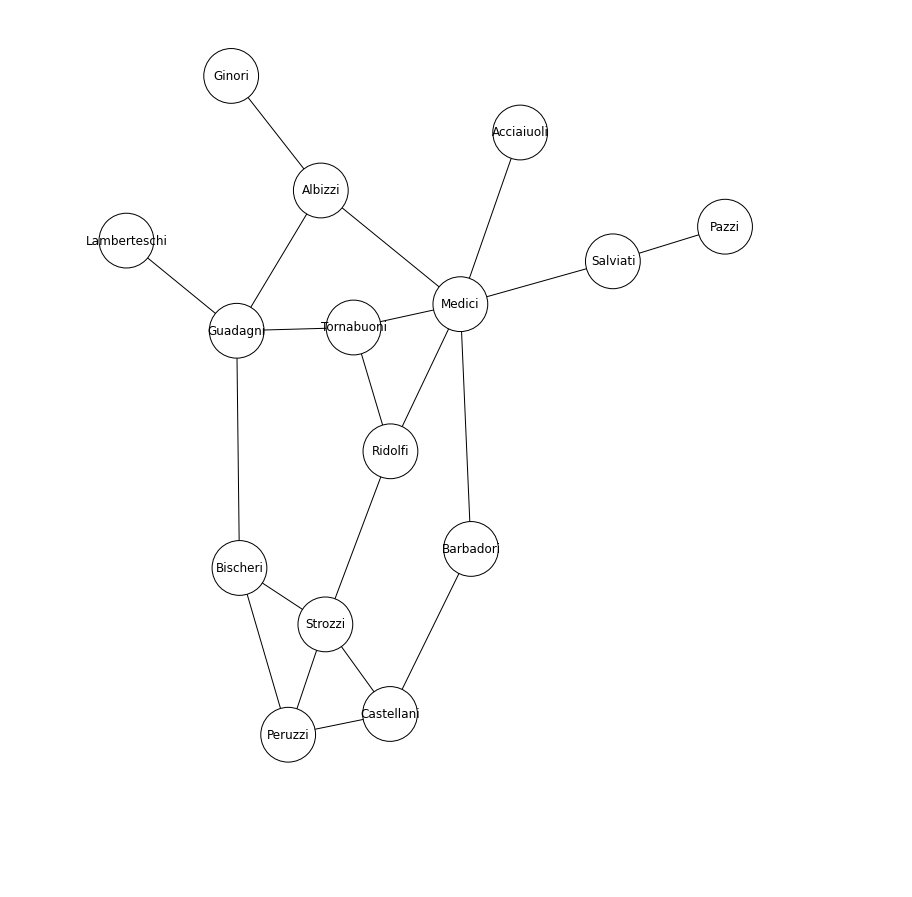

In [95]:
G = nx.florentine_families_graph()
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

In [96]:
source = 'Medici'
target = 'Peruzzi'
nx.shortest_path(G, source, target)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [97]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]

In [98]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

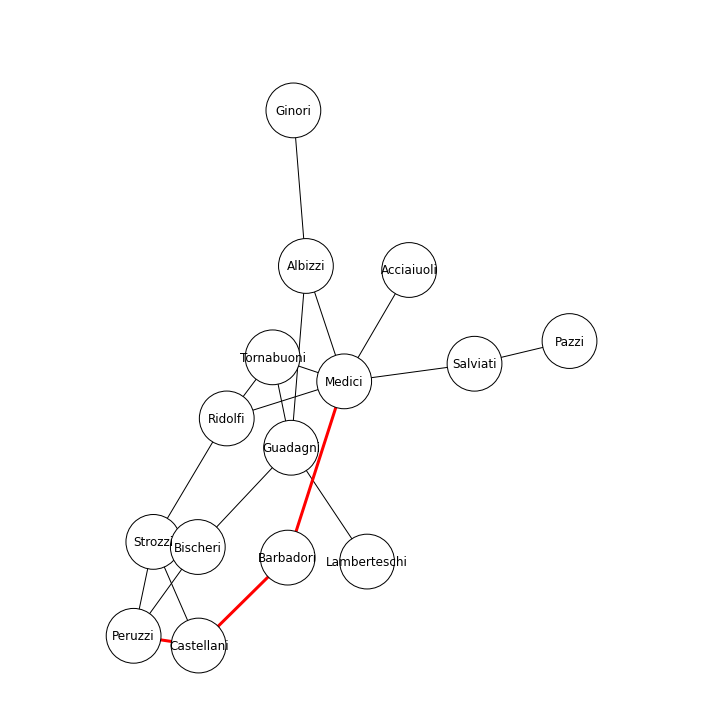

In [99]:
plot_paths(G, [nx.shortest_path(G, source, target)])

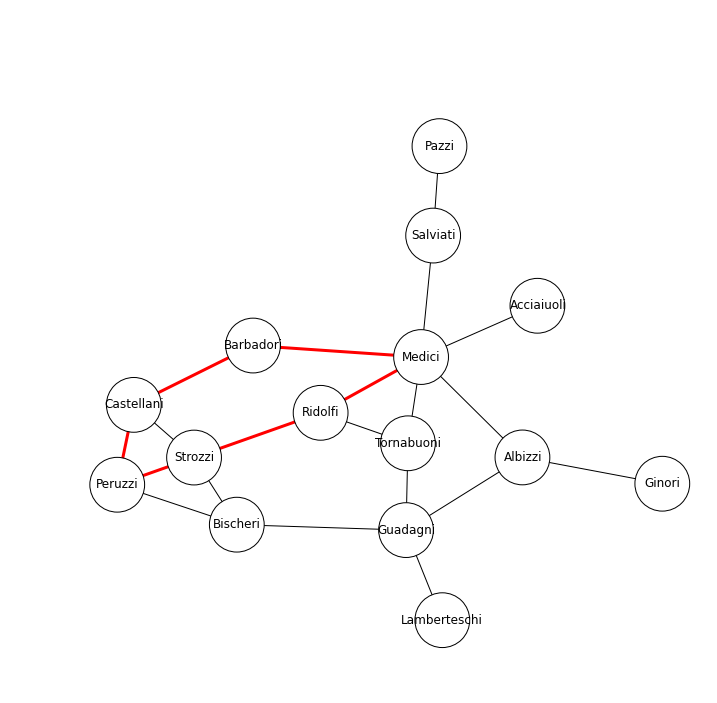

In [100]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

### Node centrality analyse

Zentralitätsanalyse erlaubt uns die wichtigsten - zentralsten - Akteure des Netzwerks zu bestommen. Es gibt einen [Haufen](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)  verschiedener Zentralitätsmaße, sie kommen zu unterschiedlichen Resultaten - je nachdem was uns interessiert. 

Wir schauen uns das mal bei den Familien an, hier bedeutet eine Kante dass eine Hochzeit zwischen zwei Familien stattgefunden hat. 

Anfang des 14 Jahrhunderts waren die Medici nicht nur die reichsten aber auch eine der mächtigsten Familien in Florenz. 

Mit Hilfe der Netzwerkanalyse können wir zeigen, dass ihre zentrale Position dafür verantwortlich war. 

In [105]:
G = nx.florentine_families_graph()

### Degree Centrality

Degree centrality ist die Anzahl der Kanten eines Knotens. Wieviele Nachbarn habe ich im Verhältniss zu wieviele könnte ich maximal haben. 

Der Output von **nx.degree_centrality** ist ein dict, bei dem der value die degree centrality enthält. 

In [102]:
from operator import itemgetter

In [103]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.42857142857142855),
 ('Strozzi', 0.2857142857142857),
 ('Guadagni', 0.2857142857142857),
 ('Tornabuoni', 0.21428571428571427),
 ('Albizzi', 0.21428571428571427),
 ('Ridolfi', 0.21428571428571427),
 ('Bischeri', 0.21428571428571427),
 ('Peruzzi', 0.21428571428571427),
 ('Castellani', 0.21428571428571427),
 ('Salviati', 0.14285714285714285),
 ('Barbadori', 0.14285714285714285),
 ('Ginori', 0.07142857142857142),
 ('Pazzi', 0.07142857142857142),
 ('Acciaiuoli', 0.07142857142857142),
 ('Lamberteschi', 0.07142857142857142)]

### Betweenness centrality

Die Betweenness centrality eines Knotens  `v` enspricht der Summe der Anteile aller kürzesten Pfade die durch diesen Knoten laufen: 

$$ c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

 `V` sind die Knoten,  $\sigma(s, t)$ ist die Summe der Kürzesten Pfade `(s, t)`,  and $\sigma(s, t|v)$ is the Summe der kürzesten Pfade die durch `v` verlaufen.
 
 Kurz gesagt Knoten die mehrere Personen verbinden, oder oft dazwischen liegen haben eine hohe Betweenness. 

In [104]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.521978021978022),
 ('Guadagni', 0.25457875457875456),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311357),
 ('Bischeri', 0.1043956043956044),
 ('Strozzi', 0.10256410256410256),
 ('Barbadori', 0.09340659340659341),
 ('Tornabuoni', 0.09157509157509157),
 ('Castellani', 0.05494505494505495),
 ('Peruzzi', 0.02197802197802198),
 ('Ginori', 0.0),
 ('Pazzi', 0.0),
 ('Acciaiuoli', 0.0),
 ('Lamberteschi', 0.0)]

### Closeness centrality

Closness centrality ist die summe der Kürzesten Pfade vom Knoten zu allen anderen Knoten. Da diese Summe von der Anzahl der Knoten im Graphen abhängt wird sie durch die Summe aller möglichen Entfernungen normiert. 

$$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$

wo `d(v, u)` der kürzeste Pfad zwischen `v` und `u` ist und `n` ist die Anzahl der Knoten im Graphen. Höhere Werte enstprechen höherer closness centrality. 


In [106]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.56),
 ('Ridolfi', 0.5),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Guadagni', 0.4666666666666667),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Bischeri', 0.4),
 ('Salviati', 0.3888888888888889),
 ('Castellani', 0.3888888888888889),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Ginori', 0.3333333333333333),
 ('Lamberteschi', 0.32558139534883723),
 ('Pazzi', 0.2857142857142857)]

### Eigenvector Centrality

Eigenvector centrality gibt jedem Knoten relative gewichte, basierend auf der Idee dass Knoten mit hohen Gewichten auch viel zur Zentrelität beitragen als Knoten mit niedrigen Gewichten.  

Googles pagerank ist eine variante der Eigenvektor zentralität. (NetworkX kann auch pagerank)

In [107]:
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.43031542583499227),
 ('Strozzi', 0.3559730326460451),
 ('Ridolfi', 0.3415544259074365),
 ('Tornabuoni', 0.32584670416957395),
 ('Guadagni', 0.2891171573226501),
 ('Bischeri', 0.28279439587133565),
 ('Peruzzi', 0.27572243741048336),
 ('Castellani', 0.25902003784235145),
 ('Albizzi', 0.2439605296754477),
 ('Barbadori', 0.21170574706479847),
 ('Salviati', 0.14592084164171834),
 ('Acciaiuoli', 0.1321573195285342),
 ('Lamberteschi', 0.0887925311349955),
 ('Ginori', 0.0749245316027793),
 ('Pazzi', 0.044814939703863084)]

### Korrelation zwichen Zentralitätsmaßen

Wir sehen dass die Medici in vier Maßen die höchste Zentralität hatten, das muss aber nicht immer der Fall sein. 

In der Praxis ist es nützlich sich die Korrelation zwichen den Zentralitätsmaßen ausgeben zu lassen um zu schauen ob sie unterschiedliche Aspekte beleuchten oder nicht. Am einfachsten geht es mit pandas. 

In [109]:
import pandas as pd
import seaborn as sns

In [110]:
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,betweenness,closeness,degree,eigenvector
Acciaiuoli,0.000000,0.368421,0.071429,0.132157
Albizzi,0.212454,0.482759,0.214286,0.243961
Barbadori,0.093407,0.437500,0.142857,0.211706
Bischeri,0.104396,0.400000,0.214286,0.282794
Castellani,0.054945,0.388889,0.214286,0.259020
Ginori,0.000000,0.333333,0.071429,0.074925
Guadagni,0.254579,0.466667,0.285714,0.289117
Lamberteschi,0.000000,0.325581,0.071429,0.088793
Medici,0.521978,0.560000,0.428571,0.430315
Pazzi,0.000000,0.285714,0.071429,0.044815


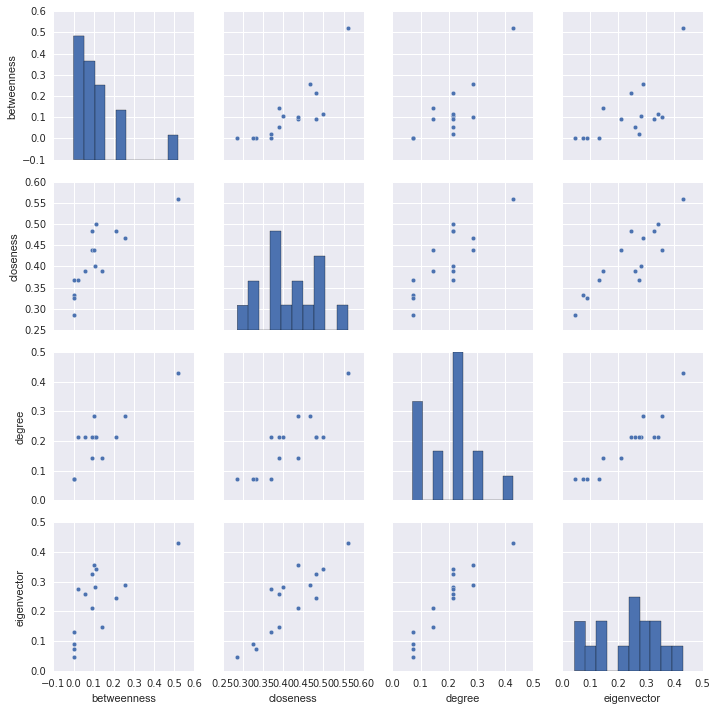

In [101]:
sns.pairplot(centrality)

#### Ein Beispiel mit nicht hoch korrelierten Zentraltitätsmaßen

Ein Graph mit zwei Comminities die über eine Person verbunden werden. Diese Person hat einen hohe Betweeness und Closenss aber eben eine niedrigen Degree und Eigenvektor Zentralität.

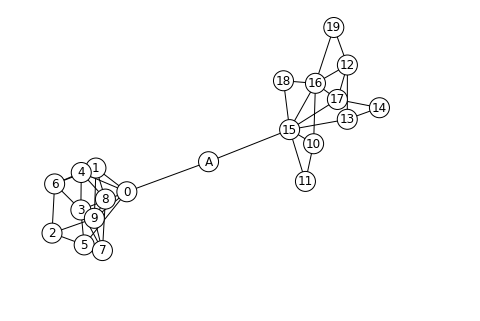

In [111]:
done = False
while not done:
    B = nx.disjoint_union(nx.fast_gnp_random_graph(10, 0.5), nx.fast_gnp_random_graph(10, 0.5))
    B.add_edges_from([('A', 0), ('A', 15)])
    try:
        eig = nx.eigenvector_centrality(B)
        if nx.is_connected(B):
            done = True
    except:
        pass
nx.draw(B, node_size=400, node_color='white', with_labels=True)

#### Aufgabe

Analysiert die Zentralitätsmaße und macht einen ähnlichen Vergleich wie oben. 

In [112]:
# Degree Centrality
# degc = nx.degree_centrality(B)
# sorted(degc.items(), key=itemgetter(1), reverse=True)

In [113]:
# Betweenness Centrality
# bet = nx.betweenness_centrality(B)
# sorted(bet.items(), key=itemgetter(1), reverse=True)

In [114]:
# Closeness centrality
# clos = nx.closeness_centrality(B)
# sorted(clos.items(), key=itemgetter(1), reverse=True)

In [115]:
# Eigenvector centrality
# eig = nx.eigenvector_centrality(B)
# sorted(eig.items(), key=itemgetter(1), reverse=True)

In [116]:
# Build a pandas DataFrame with nodes as rows and centrality scores as columns
#centrality_measures = {
#    'degree': nx.degree_centrality(B),
#    'betweenness': nx.betweenness_centrality(B),
#    'closeness': nx.closeness_centrality(B),
#    'eigenvector': nx.eigenvector_centrality(B),
#}
#centrality = pd.DataFrame(centrality_measures)
#centrality


In [117]:
# Plot a pairplot of the centrality scores to see their correlation
#sns.pairplot(centrality)

### Components, cliques, k-cores, and k-components

A **subgraph** of $G$ is a graph whose nodes and edges are all in $G$. An **induced subgraph** $G[U]$ is a subgraph defined by a subset of nodes $U \subseteq V(G)$ with all the edges in $G$ that link nodes in $U$. A subgraph is **maximal** in respect to some property if the addition of more nodes to the subgraph will cause the loss of that property.

#### Connected components
For undirected graphs, a **component** is a maximal connected subgraph, which means that there is at least one path between any two nodes in that subgraph.

For directed graphs, a **weakly connected component** is a subgraph that is connected if we replace all of its directed edges with undirected edges. A **strongly connected component** is a subgraph where there is a path in each direction between each pair of nodes of the subgraph.

You can check NetworkX documentation for the functions that deal with [components](http://networkx.readthedocs.io/en/latest/reference/algorithms.component.html).


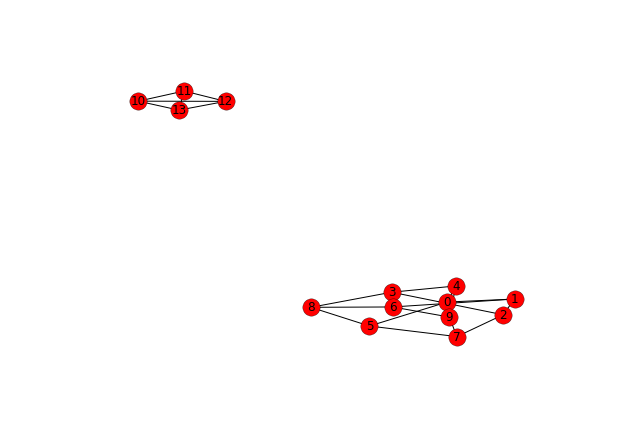

In [112]:
G = nx.disjoint_union(nx.petersen_graph(), nx.tetrahedral_graph())
nx.draw(G, with_labels=True)

The function **nx.connected_components** yields sets of nodes that form the components of the graph. If you want the induced subgraphs of the components you have to use **nx.connected_component_subgraphs**

In [113]:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13}]

##### Quick execise
How to select the largest connected component of a graph?

In [114]:
largest = max(nx.connected_components(G), key=len)
len(largest)

10

Returning to the florentine families marriage graph, we can analyze the importance of each family in maintaining the graph connected by removing each node, checking if the graph remains connected after the removal, and computing the percentage of nodes in the largest connected component if removing the node disconnects the graph:

In [115]:
G = nx.florentine_families_graph()

In [116]:
# The florentine families graph is connected, thus all nodes are in the same connected component.
list(nx.connected_components(G))

[{'Acciaiuoli',
  'Albizzi',
  'Barbadori',
  'Bischeri',
  'Castellani',
  'Ginori',
  'Guadagni',
  'Lamberteschi',
  'Medici',
  'Pazzi',
  'Peruzzi',
  'Ridolfi',
  'Salviati',
  'Strozzi',
  'Tornabuoni'}]

In [117]:
for family in G:
    H = G.copy()
    H.remove_node(family)
    if not nx.is_connected(H):
        largest = max(nx.connected_components(H), key=len)
        percent = len(largest) / len(G) * 100
        print('{}: size of the largest connected component = {:.1f}%'.format(family, percent))

Medici: size of the largest connected component = 73.3%
Albizzi: size of the largest connected component = 86.7%
Guadagni: size of the largest connected component = 86.7%
Salviati: size of the largest connected component = 86.7%


For directed graphs we have to distinguish between weakly and strongly connected components:

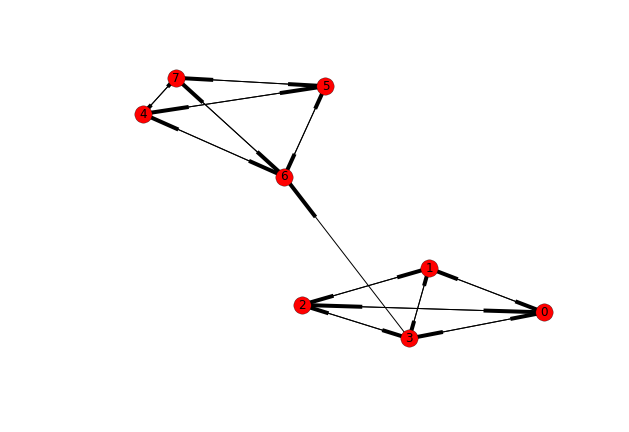

In [118]:
D = nx.disjoint_union(
    nx.tetrahedral_graph(create_using=nx.DiGraph()),
    nx.tetrahedral_graph(create_using=nx.DiGraph())
)
D.add_edge(3, 6)
nx.draw(D, with_labels=True)

In [119]:
list(nx.weakly_connected_components(D))

[{0, 1, 2, 3, 4, 5, 6, 7}]

In [120]:
list(nx.strongly_connected_components(D))

[{4, 5, 6, 7}, {0, 1, 2, 3}]

#### $k$-components

* The removal of a node $v$ from $G$ results in a subgraph $G - v$ that does not contain $v$ nor any of its incident edges.

* The **node connectivity** of a graph $G$ is denoted $\kappa(G)$ and is defined as the minimum number of nodes that must be removed in order to disconnect the graph $G$. Those nodes that must be removed to disconnect $G$ form a **node cut-set**. If it is only necessary to remove one node to disconnect $G$, this node is called an **articulation point**.

* We can also define the **local node connectivity** for two nodes $u$ and $v$, denoted $\kappa_{G}(u,v)$, as the minimum number of nodes that must be removed in order to destroy all paths that join $u$ and $v$ in $G$. Then the **node connectivity** of $G$ is equal to $min{\{\kappa_{G}(u,v):u,v \in V(G)\}}$.

* Similarly, the **edge connectivity** of a graph $G$ is denoted $\lambda(G)$ and is defined as the minimum number of edges that must be removed in order to disconnect the graph $G$. The edges that must be removed to disconnect $G$ form an **edge cut-set**.

* A **$k$-component** is a maximal subgraph of a graph $G$ that has, at least, node connectivity $k$: we need to remove at least $k$ nodes to break it into more components. Notice that $k$-components have an inherent hierarchical structure because they are nested in terms of connectivity: a connected graph can contain several 2-components, each of which can contain one or more tricomponents, and so forth. 

You can check NetworkX documentation for the functions that deal with [node and edge connectivity](http://networkx.readthedocs.io/en/latest/reference/algorithms.connectivity.html).

In the previous section we have seen that only 4 nodes in the florentine families graph disconnect the network when removed. By the definitions above, these nodes are **articulation points** and we can complute them faster than removing all nodes, one by one, and see which of them actually disconnect the network.

In [121]:
G = nx.florentine_families_graph()
set(nx.articulation_points(G))

{'Albizzi', 'Guadagni', 'Medici', 'Salviati'}

When we remove the articulation points from a graph we obtain a set of subgraphs for which we need to remove 2 or more nodes to diconnect them. These are the 2-components or biconnected components. Note that, by convention, dyads are considered biconnected components.

In [123]:
list(nx.biconnected_components(G))

[{'Albizzi', 'Ginori'},
 {'Pazzi', 'Salviati'},
 {'Medici', 'Salviati'},
 {'Acciaiuoli', 'Medici'},
 {'Guadagni', 'Lamberteschi'},
 {'Albizzi',
  'Barbadori',
  'Bischeri',
  'Castellani',
  'Guadagni',
  'Medici',
  'Peruzzi',
  'Ridolfi',
  'Strozzi',
  'Tornabuoni'}]

In [124]:
# Obtain the largest biconnected component as a subgraph
B = max(nx.biconnected_component_subgraphs(G), key=len)

Biconnected components, or 2-components, have node connectivity 2 which means that we need to remove two nodes to disconnect them. You can compute the node connectiviy value of a graph using the function **nx.node_connectivity**

In [126]:
nx.node_connectivity(B)

2

In order to compute which two nodes actually disconnect the biconnected component you can use the function **nx.minimum_node_cut** the output of this function is a node cut set, a set of nodes of minimum cardinality that if removed will disconnect the graph.

In [129]:
cut_set= nx.minimum_node_cut(B)
cut_set

{'Castellani', 'Medici'}

In [130]:
B.remove_nodes_from(cut_set)
nx.is_connected(B)

False

In order to compute higher order components, that is, 3-components, 4-components, ... You can use the function **nx.k_components** which returns a dictionary with connectivity levels as keys an list of sets of nodes that form a k-components at each connectivity level.

To illustrate this function we'll use the karate club graph because the florentine families graphs only have two levels of connectivity and the karate club graph has four.

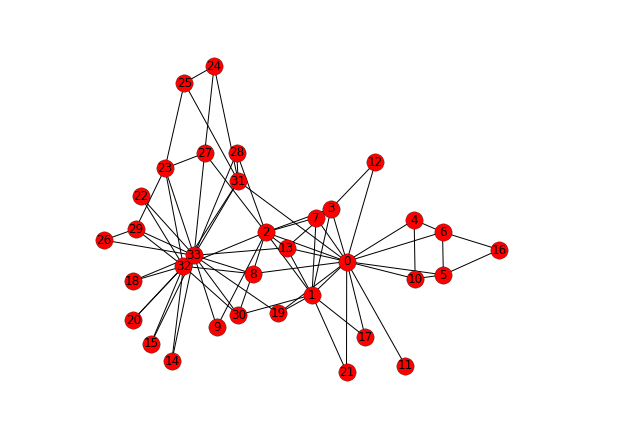

In [143]:
K = nx.karate_club_graph()
nx.draw(K, with_labels=True)

In [137]:
k_components = nx.k_components(K)
k_components

{1: [{0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33}],
 2: [{0,
   1,
   2,
   3,
   7,
   8,
   9,
   12,
   13,
   14,
   15,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33},
  {0, 4, 5, 6, 10, 16}],
 3: [{0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33},
  {0, 4, 5, 6, 10}],
 4: [{0, 1, 2, 3, 7, 8, 13, 30, 32, 33}]}

In [138]:
# Build the subgraph of nodes that form a 4-component
K4 = K.subgraph(k_components[4][0])

In [139]:
nx.node_connectivity(K4)

4

In [141]:
cut_set = nx.minimum_node_cut(K4)
cut_set

{1, 8, 32, 33}

In [142]:
K4.remove_nodes_from(cut_set)
nx.is_connected(K4)

False

#### Cliques
A **complete graph** is a graph in which all possible edges are present, so its density is 1. A **clique** is an induced subgraph $G[U]$ formed by a subset of nodes $U \subseteq V(G)$ if, and only if, the induced subgraph $G[U]$ is a complete graph. Thus, there is an edge that links each pair of nodes in a clique.

By convention dyads are considered cliques but they are not very interesting so it's safe to filter them out.

In [145]:
cliques = list(nx.find_cliques(K))
[clique for clique in cliques if len(clique) > 2]

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 12, 3],
 [2, 32, 8],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31]]

In [146]:
clique = K.subgraph([0, 1, 2, 3, 13])
nx.density(clique)

1.0

#### $k$-cores
A $k$-core of $G$ is a maximal subgraph in which all nodes have degree greater or equal than $k$; which means that a $k$-core is a maximal subgraph with the property $\delta \ge k$. The **core number** of a node is the largest value $k$ of a $k$-core containing that node.

In [147]:
nx.core_number(K)

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 3,
 5: 3,
 6: 3,
 7: 4,
 8: 4,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 4,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 3,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

We can obtain the subgraph that forms a k-core using the function **nx.kcore**

In [148]:
C3 = nx.k_core(K, 3)

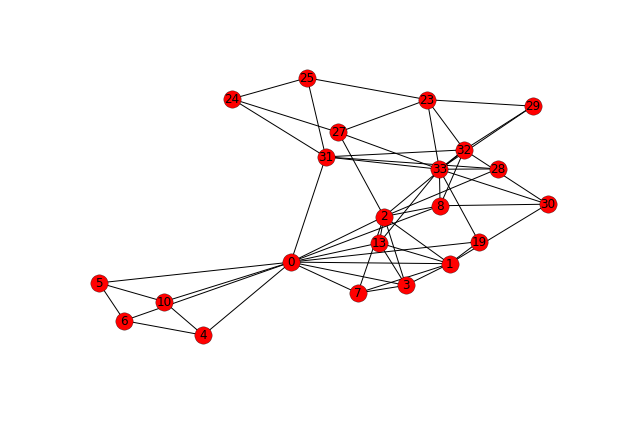

In [150]:
nx.draw(C3, with_labels=True)

Note that k-cores, even though all nodes have degree at least k, do not have the connectivity properties of k-components. In this example the 3-core can be disconnected by removing only one node: 0.

In [153]:
nx.node_connectivity(C3)

1

If we look at the k-components that we computed before we can see that in this 3-core there are actually two distinct 3-components:

In [154]:
k_components[3]

[{0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33},
 {0, 4, 5, 6, 10}]

### Exercise: Analyze the karate club graph

The Karate Club graph we used in the previous exercises is a well-known social network of a university karate club described in "An Information Flow Model for Conflict and Fission in Small Groups" paper by Wayne W. Zachary. See [wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) for more information.

The club suffered a split during Zachary's field work which resulted in two new karate clubs, one managed by the instructor named 'Mr Hi' (node 0) and the other by the administrator named 'the Officer' (node 33).

Analyze the centrality metrics of nodes in this graph and see which position have both the instructor and the administrator.

In this graph nodes have a node attribute named 'club' with values 'Mr. Hi' or 'Officer' to indicate to which club each member went after the split. Plot the graph using different colors for nodes with different values of the node attribute 'club'.

In [160]:
K = nx.karate_club_graph()

In [161]:
degc = nx.degree_centrality(K)
bet = nx.betweenness_centrality(K)
clos = nx.closeness_centrality(K)
eig = nx.eigenvector_centrality(K)

In [162]:
sorted(bet.items(), key=itemgetter(1), reverse=True)

[(0, 0.4376352813852815),
 (33, 0.304074975949976),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374),
 (6, 0.029987373737373736),
 (27, 0.02233345358345358),
 (23, 0.017613636363636363),
 (30, 0.014411976911976907),
 (3, 0.011909271284271283),
 (25, 0.0038404882154882154),
 (29, 0.0029220779220779218),
 (24, 0.0022095959595959595),
 (28, 0.0017947330447330447),
 (9, 0.0008477633477633478),
 (4, 0.0006313131313131313),
 (10, 0.0006313131313131313),
 (7, 0.0),
 (11, 0.0),
 (12, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (26, 0.0)]

Note that the instructor (node 0) and the administrator (node 33) are at the top of all centrality measures with very close scores.

In [163]:
def plot_karate_club_graph():
    K = nx.karate_club_graph()
    nodes_instructor = {n for n, d in K.nodes(data=True) if d['club']=='Mr. Hi'}
    nodes_admin = set(K) - nodes_instructor
    pos = nx.fruchterman_reingold_layout(K)
    #plot edges
    nx.draw_networkx_edges(K, pos)
    #plot nodes
    nx.draw_networkx_nodes(K, pos, nodelist=nodes_instructor, node_size=400, node_color='green')
    nx.draw_networkx_nodes(K, pos, nodelist=nodes_admin, node_size=400, node_color='red')
    # plot labels
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in K})
    # remove axes and grid
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

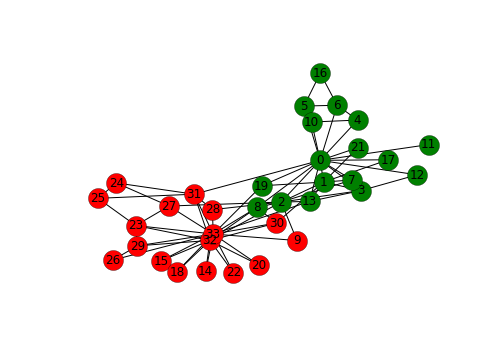

In [164]:
plot_karate_club_graph()

## Bipartite Graphs

Bipartite graphs $B = (U, V, E)$ have two node sets $U$,$V$ and edges in $E$ that only connect nodes from opposite sets. It is common in the literature to use an spatial analogy referring to the two node sets as top and bottom nodes.

The bipartite algorithms are not imported into the NetworkX namespace at the top level so the easiest way to use them is with:

In [165]:
from networkx.algorithms import bipartite

NetworkX does not have a custom bipartite graph class but the **Graph()** or **DiGraph()** classes can be used to represent bipartite graphs. However, you have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set. The convention used in NetworkX is to use a **node attribute** named **bipartite** with values 0 or 1 to identify the sets each node belongs to. This convention is not enforced in the source code of bipartite functions, it’s only a recommendation.

For example:

In [166]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

Many algorithms of the bipartite module of NetworkX require, as an argument, a container with all the nodes that belong to one set, in addition to the bipartite graph $B$. The functions in the bipartite package do not check that the node set is actually correct nor that the input graph is actually bipartite. If $B$ is connected, you can find the two node sets using a two-coloring algorithm:

In [167]:
nx.is_connected(B)

True

In [168]:
bottom_nodes, top_nodes = bipartite.sets(B)
print(top_nodes)

{'b', 'c', 'a'}


However, if the input graph is not connected, there are more than one possible colorations. This is the reason why we require the user to pass a container with all nodes of one bipartite node set as an argument to most bipartite functions. In version 2.0 of NetworkX an **AmbiguousSolution** Exception is raised if the input graph for **bipartite.sets** is disconnected.

Using the bipartite node attribute, you can easily get the two node sets:

In [169]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(B) - top_nodes

So you can easily use the bipartite algorithms that require, as an argument, a container with all nodes that belong to one node set:

In [170]:
bipartite.density(B, bottom_nodes)

0.5

All bipartite graph generators in NetworkX build bipartite graphs with the bipartite node attribute. Thus, you can use the same approach:

In [171]:
RB = bipartite.random_graph(5, 7, 0.2)
RB_top = {n for n, d in RB.nodes(data=True) if d['bipartite']==0}
RB_bottom = set(RB) - RB_top

In [172]:
list(RB_top)

[0, 1, 2, 3, 4]

In [173]:
list(RB_bottom)

[5, 6, 7, 8, 9, 10, 11]

### Working with bipartite graphs: modeling group affiliations

We'll use as an example the data collected by Davis et al. in 1930s about the observed attendance at 14 social events by 18 women in a Southern state of the USA.

The nodes in the bipartite graph are both women and events, and each women is linked to the events that she attended.

In [177]:
D = nx.davis_southern_women_graph()
list(D.nodes(data=True))

[('Katherina Rogers', {'bipartite': 0}),
 ('E8', {'bipartite': 1}),
 ('Olivia Carleton', {'bipartite': 0}),
 ('Nora Fayette', {'bipartite': 0}),
 ('E4', {'bipartite': 1}),
 ('E12', {'bipartite': 1}),
 ('E11', {'bipartite': 1}),
 ('Sylvia Avondale', {'bipartite': 0}),
 ('E1', {'bipartite': 1}),
 ('Helen Lloyd', {'bipartite': 0}),
 ('Pearl Oglethorpe', {'bipartite': 0}),
 ('Theresa Anderson', {'bipartite': 0}),
 ('E2', {'bipartite': 1}),
 ('E5', {'bipartite': 1}),
 ('Laura Mandeville', {'bipartite': 0}),
 ('E7', {'bipartite': 1}),
 ('Myra Liddel', {'bipartite': 0}),
 ('E13', {'bipartite': 1}),
 ('Charlotte McDowd', {'bipartite': 0}),
 ('E14', {'bipartite': 1}),
 ('Brenda Rogers', {'bipartite': 0}),
 ('Dorothy Murchison', {'bipartite': 0}),
 ('Frances Anderson', {'bipartite': 0}),
 ('Evelyn Jefferson', {'bipartite': 0}),
 ('E6', {'bipartite': 1}),
 ('Eleanor Nye', {'bipartite': 0}),
 ('Flora Price', {'bipartite': 0}),
 ('E9', {'bipartite': 1}),
 ('Ruth DeSand', {'bipartite': 0}),
 ('Verne

The process of obtaining an unipartite graph with only women that are linked if they attended the same events is named **projection**. We can weight the edges of the projection using different criteria, for instance, we can make the weight of an edge to represent the number of event that the two women attended.

See NetworkX documentation for [bipartite projections](http://networkx.readthedocs.io/en/latest/reference/algorithms.bipartite.html#module-networkx.algorithms.bipartite.projection)

In [178]:
women = {n for n, d in D.nodes(data=True) if d['bipartite']==0}
W = bipartite.weighted_projected_graph(D, women)

In [180]:
list(W.nodes())

['Katherina Rogers',
 'Olivia Carleton',
 'Myra Liddel',
 'Charlotte McDowd',
 'Laura Mandeville',
 'Brenda Rogers',
 'Nora Fayette',
 'Dorothy Murchison',
 'Frances Anderson',
 'Evelyn Jefferson',
 'Helen Lloyd',
 'Pearl Oglethorpe',
 'Flora Price',
 'Sylvia Avondale',
 'Ruth DeSand',
 'Verne Sanderson',
 'Theresa Anderson',
 'Eleanor Nye']

In [181]:
list(W.edges(data=True))

[('Katherina Rogers', 'Olivia Carleton', {'weight': 1}),
 ('Katherina Rogers', 'Myra Liddel', {'weight': 4}),
 ('Katherina Rogers', 'Laura Mandeville', {'weight': 1}),
 ('Katherina Rogers', 'Brenda Rogers', {'weight': 1}),
 ('Katherina Rogers', 'Nora Fayette', {'weight': 5}),
 ('Katherina Rogers', 'Ruth DeSand', {'weight': 2}),
 ('Katherina Rogers', 'Dorothy Murchison', {'weight': 2}),
 ('Katherina Rogers', 'Frances Anderson', {'weight': 1}),
 ('Katherina Rogers', 'Evelyn Jefferson', {'weight': 2}),
 ('Katherina Rogers', 'Pearl Oglethorpe', {'weight': 2}),
 ('Katherina Rogers', 'Flora Price', {'weight': 1}),
 ('Katherina Rogers', 'Sylvia Avondale', {'weight': 6}),
 ('Katherina Rogers', 'Helen Lloyd', {'weight': 3}),
 ('Katherina Rogers', 'Verne Sanderson', {'weight': 3}),
 ('Katherina Rogers', 'Theresa Anderson', {'weight': 2}),
 ('Katherina Rogers', 'Eleanor Nye', {'weight': 1}),
 ('Olivia Carleton', 'Myra Liddel', {'weight': 1}),
 ('Olivia Carleton', 'Nora Fayette', {'weight': 2}),
 

#### Centrality measures of bipartite graphs

In order to compute centrality measures for bipartite graphs we cannot use the same algorithms that we used for unipartite graphs because the normalization of the measures is different. For instance, the degree centrality of a node is defined as the degree of a node divided by the maximum possible degree. In unipartite networks the maximum degree of a node is $n-1$ where $n$ is the total number of nodes of a graph, but in a bipartite graph a node maximum degree is only the total number of nodes in the opposite set; that is, the maximum degree for a woman in our graph is the number of events.

NetworkX provides functions to compute [centrality measures for bipartite graphs](http://networkx.readthedocs.io/en/latest/reference/algorithms.bipartite.html#module-networkx.algorithms.bipartite.centrality).

In order to use these functions you have to pass as an argument a set with all nodes in one bipartite set:

In [183]:
degc = bipartite.degree_centrality(D, women)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('Nora Fayette', 0.5714285714285714),
 ('Theresa Anderson', 0.5714285714285714),
 ('Evelyn Jefferson', 0.5714285714285714),
 ('E7', 0.5555555555555556),
 ('Sylvia Avondale', 0.5),
 ('Laura Mandeville', 0.5),
 ('Brenda Rogers', 0.5),
 ('E5', 0.4444444444444444),
 ('E6', 0.4444444444444444),
 ('Katherina Rogers', 0.42857142857142855),
 ('Helen Lloyd', 0.3571428571428571),
 ('E12', 0.3333333333333333),
 ('E3', 0.3333333333333333),
 ('Charlotte McDowd', 0.2857142857142857),
 ('Myra Liddel', 0.2857142857142857),
 ('Frances Anderson', 0.2857142857142857),
 ('Eleanor Nye', 0.2857142857142857),
 ('Ruth DeSand', 0.2857142857142857),
 ('Verne Sanderson', 0.2857142857142857),
 ('E10', 0.2777777777777778),
 ('E4', 0.2222222222222222),
 ('E11', 0.2222222222222222),
 ('Pearl Oglethorpe', 0.21428571428571427),
 ('E1', 0.16666666666666666),
 ('E2', 0.16666666666666666),
 ('E13', 0.16666666666666666),
 ('E14', 0.16666666666666666),
 ('Olivia Ca

In [184]:
bet = bipartite.betweenness_centrality(D, women)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204108),
 ('E7', 0.12950174424519845),
 ('Nora Fayette', 0.11346136204298479),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944681),
 ('Sylvia Avondale', 0.07170914508501829),
 ('E6', 0.06501635047516072),
 ('Laura Mandeville', 0.05135761326872536),
 ('Brenda Rogers', 0.049486599816007185),
 ('Katherina Rogers', 0.0473627540298197),
 ('Helen Lloyd', 0.04238754006434828),
 ('E5', 0.03769444252500667),
 ('E11', 0.019665390889191545),
 ('E3', 0.01822439085252718),
 ('E12', 0.018094182051395142),
 ('Ruth DeSand', 0.016783108139791406),
 ('Myra Liddel', 0.016344348365012626),
 ('Verne Sanderson', 0.015737665757646964),
 ('E10', 0.011442302600971925),
 ('Frances Anderson', 0.01071434286960598),
 ('Charlotte McDowd', 0.010596096282664415),
 ('Eleanor Nye', 0.009444123344730281),
 ('E4', 0.007702052673802943),
 ('Pearl Oglethorpe', 0.006800323334013805),
 ('Olivia Carleton', 0.0050545052362633335),
 ('Flora Pr

In [185]:
clos = bipartite.closeness_centrality(D, women)
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('E8', 0.8461538461538461),
 ('Nora Fayette', 0.8),
 ('Theresa Anderson', 0.8),
 ('Evelyn Jefferson', 0.8),
 ('E9', 0.7857142857142857),
 ('Sylvia Avondale', 0.7741935483870968),
 ('E7', 0.7333333333333333),
 ('Katherina Rogers', 0.7272727272727273),
 ('Laura Mandeville', 0.7272727272727273),
 ('Helen Lloyd', 0.7272727272727273),
 ('Brenda Rogers', 0.7272727272727273),
 ('Ruth DeSand', 0.7058823529411765),
 ('Verne Sanderson', 0.7058823529411765),
 ('E6', 0.6875),
 ('Myra Liddel', 0.6857142857142857),
 ('Eleanor Nye', 0.6666666666666666),
 ('Frances Anderson', 0.6666666666666666),
 ('Pearl Oglethorpe', 0.6666666666666666),
 ('Dorothy Murchison', 0.6486486486486487),
 ('Charlotte McDowd', 0.6),
 ('E5', 0.5945945945945946),
 ('Olivia Carleton', 0.5853658536585366),
 ('Flora Price', 0.5853658536585366),
 ('E12', 0.5641025641025641),
 ('E3', 0.5641025641025641),
 ('E10', 0.55),
 ('E4', 0.5365853658536586),
 ('E11', 0.5365853658536586),
 ('E1', 0.5238095238095238),
 ('E2', 0.52380952380952